# Let us load the dataset and perform exploratory data analysis

In [1]:
import pandas as pd
from datasets.packaged_modules.pandas.pandas import Pandas

train = pd.read_csv("playground-series-s5e11/train.csv")
test = pd.read_csv("playground-series-s5e11/test.csv")

print("Shape of the training data",train.shape)

Shape of the training data (593994, 13)


# Let us now in further columns look at how data looks


In [2]:
#Checking what are different columns
train.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [3]:
#Checking for null values in the columns of the training set
train.isnull().sum().sort_values(ascending=False)

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [4]:
#Checking for null values in the columns of the test set
test.isnull().sum().sort_values(ascending=False)

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [6]:
#Let us look at the head of the dataframe
train.head(10)

id  annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0   0       29367.99                 0.084           736      2528.42   
1   1       22108.02                 0.166           636      4593.10   
2   2       49566.20                 0.097           694     17005.15   
3   3       46858.25                 0.065           533      4682.48   
4   4       25496.70                 0.053           665     12184.43   
5   5       44940.30                 0.058           653     12159.92   
6   6       61574.16                 0.042           696     16907.71   
7   7       45953.31                 0.100           654     10111.62   
8   8       30592.29                 0.132           713      7522.36   
9   9       17342.45                 0.121           548      9653.48   

   interest_rate  gender marital_status education_level employment_status  \
0          13.67  Female         Single     High School     Self-employed   
1          12.92    Male        Married        Master's          Employed   
2           9.76    Male         Single     High School          Employed   
3          16.10  Female         Single     High School          Employed   
4          10.21    Male        Married     High School          Employed   
5          12.24    Male         Single      Bachelor's          Employed   
6          13.52   Other         Single     High School     Self-employed   
7          12.82  Female        Married     High School          Employed   
8           9.48    Male        Married      Bachelor's          Employed   
9          16.04  Female        Married      Bachelor's     Self-employed   

         loan_purpose grade_subgrade  loan_paid_back  
0               Other             C3             1.0  
1  Debt consolidation             D3             0.0  
2  Debt consolidation             C5             1.0  
3  Debt consolidation             F1             1.0  
4               Other             D1             1.0  
5               Other             D1             1.0  
6  Debt consolidation             C5             1.0  
7                Home             D1             1.0  
8           Education             C5             1.0  
9            Vacation             F1             1.0

In [7]:
#Let us understand how data is distributed
train.describe()

id  annual_income  debt_to_income_ratio   credit_score  \
count  593994.000000  593994.000000         593994.000000  593994.000000   
mean   296996.500000   48212.202976              0.120696     680.916009   
std    171471.442236   26711.942078              0.068573      55.424956   
min         0.000000    6002.430000              0.011000     395.000000   
25%    148498.250000   27934.400000              0.072000     646.000000   
50%    296996.500000   46557.680000              0.096000     682.000000   
75%    445494.750000   60981.320000              0.156000     719.000000   
max    593993.000000  393381.740000              0.627000     849.000000   

         loan_amount  interest_rate  loan_paid_back  
count  593994.000000  593994.000000   593994.000000  
mean    15020.297629      12.356345        0.798820  
std      6926.530568       2.008959        0.400883  
min       500.090000       3.200000        0.000000  
25%     10279.620000      10.990000        1.000000  
50%     15000.220000      12.370000        1.000000  
75%     18858.580000      13.680000        1.000000  
max     48959.950000      20.990000        1.000000

In [8]:
train["loan_paid_back"].value_counts(normalize=True)

loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64

# Let us gather start modelling

In [9]:
# Remove the target and the id column from the train set . Id we have no meaning to keep so we are removing it
X = train.drop(columns=["id","loan_paid_back"])
y = train["loan_paid_back"]


X_test = test.drop(columns=["id"])

In the below step we need to split the data with stratification cause , if you see the above distribution of the loan paid back the classes in that column are not evenly distributed, meaning 1 is around 79 percentage of the column and 0 is around 0.2 . So when scikit learn splits it we might end up with only 1 in the train or split set which would lead to bias

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)


# Let us now split the data , apply some transformations like one hot encoding etc

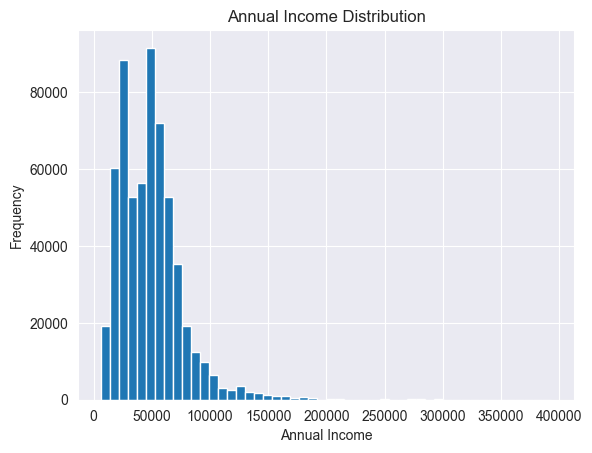

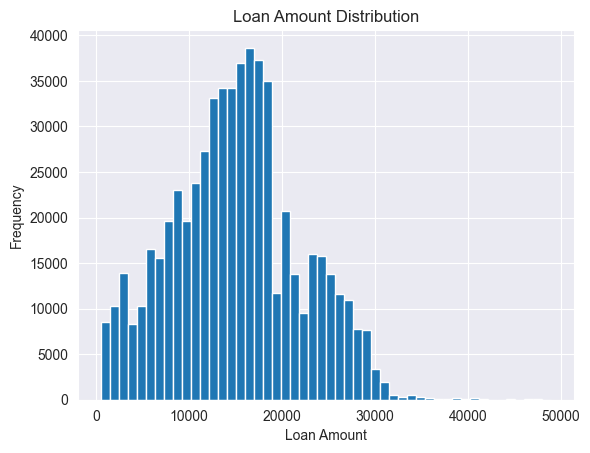

In [11]:
#Just viewing few fields for their skewedness.
import matplotlib.pyplot as plt

plt.figure()
train["annual_income"].hist(bins=50)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

plt.figure()
train["loan_amount"].hist(bins=50)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


from sklearn.preprocessing import StandardScaler

#Splitting the column names into categorical and numerical columns
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

#We will not apply any scaling to the numerical features and do one hot encoding to the categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)



Let us create a simple logistic regression model and test it

we set the class_weight as balanced . Below is a clean explanation from google

In sklearn.linear_model.LogisticRegression, the class_weight="balanced" parameter is used to automatically handle imbalanced datasets by adjusting the weights of classes inversely proportional to their frequencies. Here is a breakdown of what it does and how it affects your model: Identifies Imbalance: It automatically calculates the frequencies of your target classes (\(y\)) and assigns higher weights to the minority class and lower weights to the majority class.Modifies the Loss Function: Instead of treating every training sample as equally important, class_weight="balanced" penalizes misclassifications of the minority class more heavily than misclassifications of the majority class.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
        ))
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

# Let us check the ROC score for our baseline model

In [13]:
from sklearn.metrics import roc_auc_score

val_preds = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, val_preds)

print("Validation ROC AUC:", roc_auc)

Validation ROC AUC: 0.9106886303831234


In [15]:
# training on the full dataset

model.fit(X, y)
test_preds = model.predict_proba(X_test)[:, 1]

In [16]:
#Let us sumbit first version to kaggle for scores

submission = pd.DataFrame({
    "id": test["id"],
    "loan_paid_back": test_preds
})

submission.to_csv("submission.csv", index=False) # score 0.911

# Now let us do Feature Engineering . Create new features that will give more context to the model

grade_subgrade looks like: C3, D1, F1, etc.

This actually contains two pieces of information:

Grade: the letter (A, B, C, D, E, F, ...) → broad credit risk bucket

Subgrade: the number (1..5 usually) → finer risk level within the grade

Why splitting helps

If we keep grade_subgrade as a single category, the model learns separate buckets like:

“C3 is risky”

“C4 is slightly different”
…but it doesn’t automatically understand the structure:

A < B < C < D < E < F (worse risk)

within each grade, 1..5 is also ordered

By splitting, we give the model:

a coarse signal (grade)

a fine signal (subgrade number)

This often improves performance because risk is naturally monotonic with these.

In [17]:
def add_grade_features(df:pd.DataFrame)->pd.DataFrame:
    df = df.copy()
    df["grade"] = df["grade_subgrade"].str[0]
    df["subgrade"] = df["grade_subgrade"].str[1:].astype(int)
    return df

Feature A: loan_to_income = loan_amount / annual_income
Why this helps

A loan of 15,000 is:

easy for someone earning 120,000

very hard for someone earning 20,000

So the model should care more about:

“How big is the loan compared to income?”
not just the loan amount alone.

This feature directly captures affordability.

In [18]:
def add_ratio_features(df:pd.DataFrame)->pd.DataFrame:
    df = df.copy()
    df["loan_to_income"] = df["loan_amount"] / (df["annual_income"] + 1e-6)
    #(We add 1e-6 to avoid divide-by-zero, even though income min is > 0 in data.)
    return df

Feature B: interest_x_dti = interest_rate * debt_to_income_ratio
Why this helps

High DTI means borrower already has high monthly obligations.

High interest rate means the loan is expensive.

When both are high, risk compounds. Multiplying captures that “double trouble” effect.

In [19]:
def add_interaction_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["interest_x_dti"] = df["interest_rate"] * df["debt_to_income_ratio"]
    return df

In [20]:
#Optional log transformation of the skewed features
import numpy as np


def add_log_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["log_annual_income"] = np.log1p(df["annual_income"])
    df["log_loan_amount"] = np.log1p(df["loan_amount"])
    return df

In [24]:
def engineer(df: pd.DataFrame) -> pd.DataFrame:
    df = add_grade_features(df)
    df = add_ratio_features(df)
    df = add_interaction_features(df)
    df = add_log_features(df)  # optional
    return df

train_fe = engineer(train)
test_fe  = engineer(test)


# We will not use one hot encoding but make the textual columns as category
Why NOT one-hot encoding here?

One-hot encoding:

Explodes dimensionality

Slows training

Loses ordering/grouping information


In [25]:
cat_cols = train_fe.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    train_fe[col] = train_fe[col].astype("category")
    test_fe[col] = test_fe[col].astype("category")

Lets next perform cross validation

In [27]:
X = train_fe.drop(columns=["id", "loan_paid_back"])
y = train_fe["loan_paid_back"]

X_test = test_fe.drop(columns=["id"])

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Why LightGBM

LightGBM trains many small trees sequentially.

Each new tree:

Focuses more on mistakes made by previous trees

Improves ranking of difficult samples

Optimizes directly for loss related to classification quality

This is why boosting usually beats single models on Kaggle.

We run RandomizedSearchCV to tune the models hyper parameters to get the best model

In [28]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base_model = LGBMClassifier(
    objective="binary",
    metric="auc",
    boosting_type="gbdt",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "learning_rate": [0.03, 0.05, 0.07, 0.1],
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 6, 8, 10],
    "min_child_samples": [20, 50, 100, 200],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "n_estimators": [2000, 4000, 6000]
}

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,                 # increase to 50+ later if you want
    scoring="roc_auc",
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X, y)

print("Best CV AUC:", search.best_score_)
print("Best params:", search.best_params_)

best_model = search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Number of positive: 379596, number of negative: 95600
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2365
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798819 -> initscore=1.378932
[LightGBM] [Info] Start training from score 1.378932
[LightGBM] [Info] Nu

/Users/prgowtha/PycharmProjects/JupyterProject/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798819 -> initscore=1.378932
[LightGBM] [Info] Start training from score 1.378932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END colsample_bytree=0.9, learning_rate=0.03, max_depth=10, min_child_samples=20, n_estimators=2000, num_leaves=127, subsample=1.0; total time= 6.0min
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034642 seconds.
You can set `force_row_w

We now take the best model train ti on full dataset and do prediction and get the result pd

In [29]:
best_model.fit(X, y)

test_preds = best_model.predict_proba(X_test)[:, 1]

test_preds

[LightGBM] [Info] Number of positive: 474494, number of negative: 119500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 593994, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798820 -> initscore=1.378933
[LightGBM] [Info] Start training from score 1.378933


array([0.95853175, 0.9789257 , 0.59697077, ..., 0.98273289, 0.98556905,
       0.91681884], shape=(254569,))

In [31]:
submission = pd.DataFrame({
    "id": test["id"],
    "loan_paid_back": test_preds
})

submission.to_csv("submission.csv", index=False)